In [1]:
import pymc3 as pm
import numpy as np
import arviz as az
import seaborn as sns

In [2]:
x = np.random.normal(size=100)*0.2+3.0

with pm.Model() as m1:
    μ = pm.Normal("μ", mu=0, sigma=5)
    σ = pm.Exponential("σ", 1)
    x_pred = pm.Normal('x_pred', mu=μ, sd=σ, observed=x)
    prior = pm.sample_prior_predictive(samples=5000)
    

<AxesSubplot:ylabel='Density'>

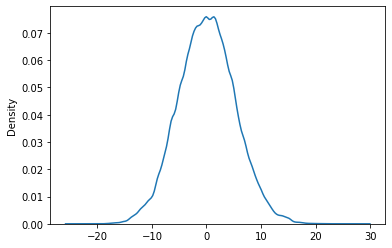

In [3]:
sns.kdeplot(prior['x_pred'].flatten())

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 13 seconds.


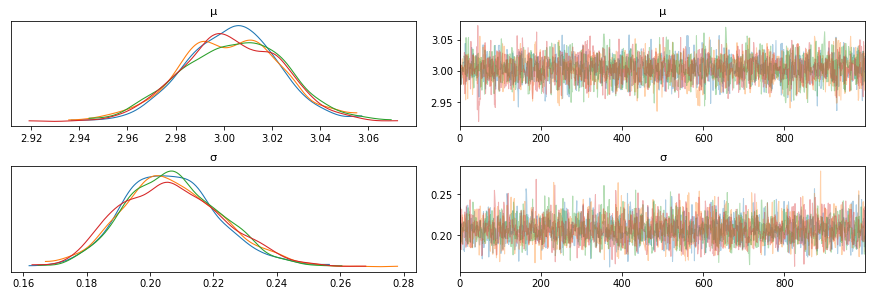

In [4]:
with m1:
    trace_1 = pm.sample(1000, tune=2000, return_inferencedata=True)

az.plot_trace(trace_1);

In [5]:
with m1:
    ppc = pm.sample_posterior_predictive(trace_1, var_names=["x_pred","σ"])

In [6]:
ppc["x_pred"].shape

(4000, 100)

In [7]:
#az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=m1))